In [18]:
# Import the analysis tools
import pandas as pd 
import matplotlib.pyplot as plt 

# Import the data file 

In [19]:
df = pd.read_csv('http://128.198.162.191/dataFiles/VIDEO-GAMES/Video_Games.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# Question 1
What is the top video game by units?
a. Data is in the millions of units
b. Show the Game Title and units

What we need:
Title of the games and the units, take a count of the units 

In [20]:
# Global Sales is the units sold

df_GameUnits = df[['Name','Global_Sales']]

df_GameUnits.head(1)


,Name,Global_Sales
0,Wii Sports,82.53


Now we know that the top game by units is Wii Sports with 82.53 million units sold

# Question 2
What is the top game by the number of users
a. ensure results are rounded to the nearest whole number 
b. show the game title and the number of users 

In [53]:
# We need to use the Name and the User count
df = df.loc[~df['User_Count'].isna().copy()]

df['User_Count'] = df['User_Count'].round(0).astype('int')

df_GameUsers =( df.groupby('Name')['User_Count']
.sum()
.sort_values(ascending=False)
.reset_index()
)

top_game = df_GameUsers.head(1)
print(top_game)
# the duplicate is becase it is looking at games accross all platforms

                       Name  User_Count
0  The Witcher 3: Wild Hunt       24807


# Question 3 
What are the 10 most successful games in North America by units
a. This is plotted on a bar chart 
    i. Display the Game Title on the x-axis
    ii. Display the Units on the y-axis

In [22]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129,Nintendo,E


In [ ]:
df = df.loc[~df['NA_Sales'].isna().copy()] # to make it cleaner, I am going to turn the values into whole numbers
df['NA_Sales'] = df['NA_Sales'].round(0).astype('int')

top10_NA = (df.dropna(subset=['NA_Sales']) # this is getting rid of any blank or null values
            .sort_values(by='NA_Sales', ascending=False) # we are sorting by the NA_Sale column from largest to smallest
            .head(10)[['Name','NA_Sales']] # only display the top values for these two columns
)
print(top10_NA.shape) # this is confirming that we are going to display just the top 10

top10_NA.head(10)

(10, 2)


,Name,NA_Sales
0,Wii Sports,41
3,Wii Sports Resort,16
2,Mario Kart Wii,16
14,Kinect Adventures!,15
7,Wii Play,14
8,New Super Mario Bros. Wii,14
6,New Super Mario Bros.,11
11,Mario Kart DS,10
23,Grand Theft Auto V,10
32,Call of Duty: Black Ops,10


Now we have the top 10 games in North America sorted by the units sold

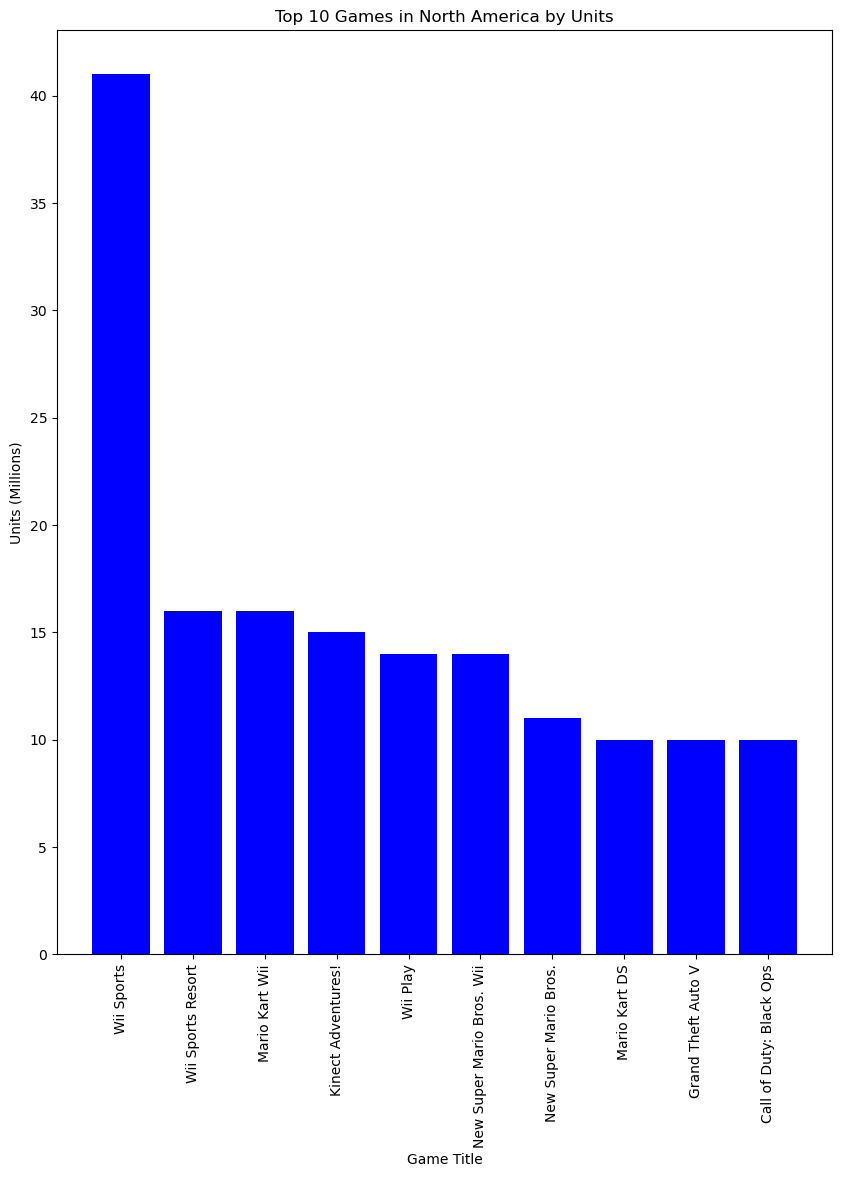

In [24]:
plt.figure(figsize=(10,12))

plt.bar(top10_NA['Name'], top10_NA['NA_Sales'], color='blue')
plt.title('Top 10 Games in North America by Units')
plt.xlabel('Game Title')
plt.ylabel('Units (Millions)')
plt.xticks(rotation=90, fontsize=10)

plt.show()

# Question 4

Show the 10 most successful games in North America by units for games released after 2010

a. this needs to be a bar chart 
    i. display game title on the X axis
    ii. display the units on the Y axis
    iii. display only the horizontal grid lines

In [44]:
# Sort the data
top10_NA_2010 = (
    df[df['Year_of_Release'] > 2010] # searching in the df, the second df is taking every single row adn comparing the year of release to see if it is greater than 2010
    .dropna(subset=['NA_Sales']) # this is dropping the rows missing info. subset is identifying to look only in a specific row
    .groupby('Name')['NA_Sales'].sum() # group by the name, so that it is accross all platforms
    .sort_values(ascending=False) # greatest to smallest 
    .head(10) # jsut show the top 10 games
    .reset_index()
)

print(top10_NA_2010)


                             Name  NA_Sales
0              Grand Theft Auto V        24
1  Call of Duty: Modern Warfare 3        16
2            Call of Duty: Ghosts        15
3      Call of Duty: Black Ops II        14
4  Call of Duty: Advanced Warfare        11
5     The Elder Scrolls V: Skyrim         9
6                   Battlefield 3         8
7                       Fallout 4         7
8                    Just Dance 3         7
9                          Halo 4         7


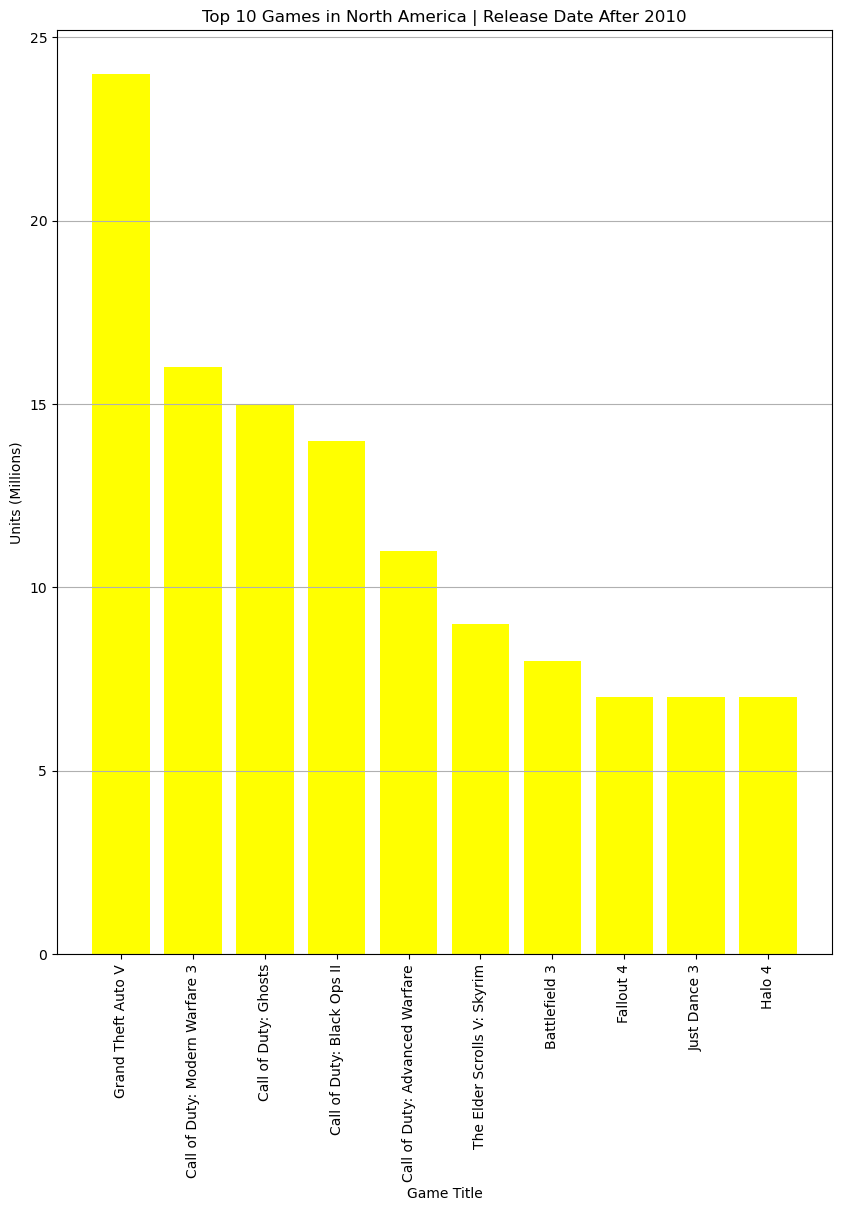

In [45]:
# Create the bar chart 
plt.figure(figsize = (10,12))

plt.bar(top10_NA_2010['Name'], top10_NA_2010['NA_Sales'], color = 'yellow')
plt.title('Top 10 Games in North America | Release Date After 2010')
plt.xlabel('Game Title')
plt.ylabel('Units (Millions)')
plt.grid(axis='y')

plt.xticks(rotation=90)
plt.show()

# Question 5

What is the total units for all games over the years represented in the data?
a. This is to be plotted in a line chart 

In [ ]:
# Sort the data 
df.head()

# We need to sum the number of global sales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41,28.96,3.77,8.45,82.53,76.0,51.0,8,322,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,16,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,16,10.93,3.28,2.95,32.77,80.0,73.0,8,192,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,14,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129,Nintendo,E


In [ ]:
total_units = df.groupby('Year_of_Release')['Global_Sales'].sum() # total number of sales 
print(total_units)

Year_of_Release
1985.0      0.03
1988.0      0.03
1992.0      0.03
1994.0      1.27
1996.0     20.35
1997.0     40.73
1998.0     48.40
1999.0     51.22
2000.0     81.92
2001.0    255.82
2002.0    294.71
2003.0    262.86
2004.0    324.10
2005.0    341.54
2006.0    425.05
2007.0    473.48
2008.0    519.03
2009.0    482.99
2010.0    425.59
2011.0    390.47
2012.0    301.08
2013.0    282.54
2014.0    245.79
2015.0    182.32
2016.0     96.23
Name: Global_Sales, dtype: float64


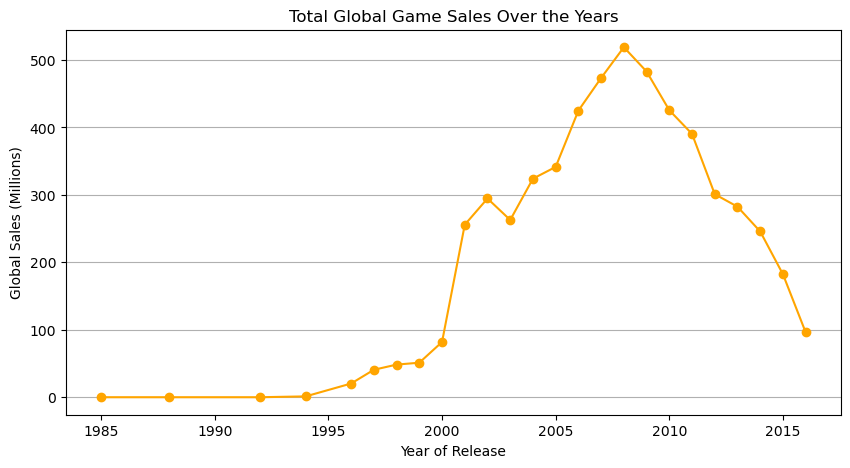

In [56]:
# Create the line chart 

plt.figure(figsize=(10,5))

plt.plot(total_units.index, total_units.values, color = 'orange', marker = 'o')
plt.title('Total Global Game Sales Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (Millions)')
plt.grid(axis='y')
plt.show()
